# Problem Statement
Analyzing Customer Purchase Behavior

You have been provided with a dataset containing information about customer transactions from an online retailer. The data includes information such as customer ID, product ID, purchase date, price, and more. The goal is to use Pandas to preprocess, clean, and analyze the data to gain insights into customer purchase behavior and product popularity.

The specific tasks you might undertake could include:

* Cleaning and preprocessing the data to remove duplicates, missing values, and other errors.

* Merging and aggregating the data to create summary tables and metrics, such as total sales by product or customer.

* Analyzing the data to identify trends and patterns in customer purchase behavior, such as which products are frequently purchased together, which products are popular at different times of year, or which customers are most valuable to the business.

* Creating visualizations to help communicate the results of your analysis, such as scatter plots, bar charts, or heat maps.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read datsaet
dataset=pd.read_excel('online_retail_II.xlsx')

In [3]:
#first five records of dataset
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#Describe teh dataset
dataset.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [5]:
#Total Number of countries
dataset.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [6]:
#shape of the dataset
dataset.shape

(525461, 8)

In [7]:
dataset.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
# shifting columns according to accomodate total sales column
dataset=dataset[['Customer ID','StockCode','Invoice','Quantity','Price', 'InvoiceDate', 'Description', 'Country']]

In [9]:
dataset.head()

,Customer ID,StockCode,Invoice,Quantity,Price,InvoiceDate,Description,Country
0,13085.0,85048,489434,12,6.95,2009-12-01 07:45:00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,13085.0,79323P,489434,12,6.75,2009-12-01 07:45:00,PINK CHERRY LIGHTS,United Kingdom
2,13085.0,79323W,489434,12,6.75,2009-12-01 07:45:00,WHITE CHERRY LIGHTS,United Kingdom
3,13085.0,22041,489434,48,2.10,2009-12-01 07:45:00,"RECORD FRAME 7"" SINGLE SIZE",United Kingdom
4,13085.0,21232,489434,24,1.25,2009-12-01 07:45:00,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom


In [10]:
dataset.isnull().sum()

Customer ID    107927
StockCode           0
Invoice             0
Quantity            0
Price               0
InvoiceDate         0
Description      2928
Country             0
dtype: int64

In [17]:
dataset.count()

Customer ID    417534
StockCode      525461
Invoice        525461
Quantity       525461
Price          525461
InvoiceDate    525461
Description    522533
Country        525461
dtype: int64

In [18]:
##Total amount (Quantity x price )
dataset['Total_amount']=dataset['Price']*dataset['Quantity']

In [19]:
dataset[['Customer ID','StockCode','Invoice','Quantity','Price','Total_amount','InvoiceDate', 'Description', 'Country']]

,Customer ID,StockCode,Invoice,Quantity,Price,Total_amount,InvoiceDate,Description,Country
0,13085.0,85048,489434,12,6.95,83.40,2009-12-01 07:45:00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,13085.0,79323P,489434,12,6.75,81.00,2009-12-01 07:45:00,PINK CHERRY LIGHTS,United Kingdom
2,13085.0,79323W,489434,12,6.75,81.00,2009-12-01 07:45:00,WHITE CHERRY LIGHTS,United Kingdom
3,13085.0,22041,489434,48,2.10,100.80,2009-12-01 07:45:00,"RECORD FRAME 7"" SINGLE SIZE",United Kingdom
4,13085.0,21232,489434,24,1.25,30.00,2009-12-01 07:45:00,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom
...,...,...,...,...,...,...,...,...,...
525456,17530.0,22271,538171,2,2.95,5.90,2010-12-09 20:01:00,FELTCRAFT DOLL ROSIE,United Kingdom
525457,17530.0,22750,538171,1,3.75,3.75,2010-12-09 20:01:00,FELTCRAFT PRINCESS LOLA DOLL,United Kingdom
525458,17530.0,22751,538171,1,3.75,3.75,2010-12-09 20:01:00,FELTCRAFT PRINCESS OLIVIA DOLL,United Kingdom
525459,17530.0,20970,538171,2,3.75,7.50,2010-12-09 20:01:00,PINK FLORAL FELTCRAFT SHOULDER BAG,United Kingdom


# Clean dataset (remove missing values and duplicates)


In [20]:
dataset.isnull().sum()

Customer ID     107927
StockCode            0
Invoice              0
Quantity             0
Price                0
InvoiceDate          0
Description       2928
Country              0
Total_amount         0
dtype: int64

In [21]:
clean_data=dataset.dropna(axis='index', how='any')

In [44]:
clean_data.describe()
clean_data.isnull().sum()

Customer ID     0
StockCode       0
Invoice         0
Quantity        0
Price           0
InvoiceDate     0
Description     0
Country         0
Total_amount    0
dtype: int64

In [23]:
clean_data.drop_duplicates(inplace=True)
clean_data.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_1068\1698212764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop_duplicates(inplace=True)


(410763, 9)

In [24]:
clean_data.isnull().sum()

Customer ID     0
StockCode       0
Invoice         0
Quantity        0
Price           0
InvoiceDate     0
Description     0
Country         0
Total_amount    0
dtype: int64

In [25]:
#exploring unique values of each attribute
print("total number of unique customers: ",clean_data['Customer ID'].nunique())
print("total number of unique products: ",clean_data['StockCode'].nunique())
print("total number of unique transactions: ",clean_data['Invoice'].nunique())
print("total number of unique countries: ",clean_data['Country'].nunique())

total number of unique customers:  4383
total number of unique products:  4031
total number of unique transactions:  23587
total number of unique countries:  37


# Exploratory data analysis(EDA)

In [27]:
# Grouping countries by highest number of purchases
sales_by_country = dataset.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
sales_by_country

Country
United Kingdom          4429046
Denmark                  227030
EIRE                     188704
Netherlands              181823
Germany                  107133
France                    74471
Sweden                    52238
Switzerland               22053
Australia                 20053
Spain                     18332
Belgium                   11980
Portugal                  11878
Channel Islands           10994
Norway                     7863
Italy                      7310
Japan                      6604
Austria                    6479
Greece                     6151
United Arab Emirates       5746
Cyprus                     4371
Finland                    3651
Unspecified                3416
Bermuda                    2798
USA                        2666
Thailand                   2552
Lithuania                  2306
Hong Kong                  2306
Poland                     1991
Singapore                  1753
RSA                        1618
Malta                      1547


<AxesSubplot: xlabel='Country'>

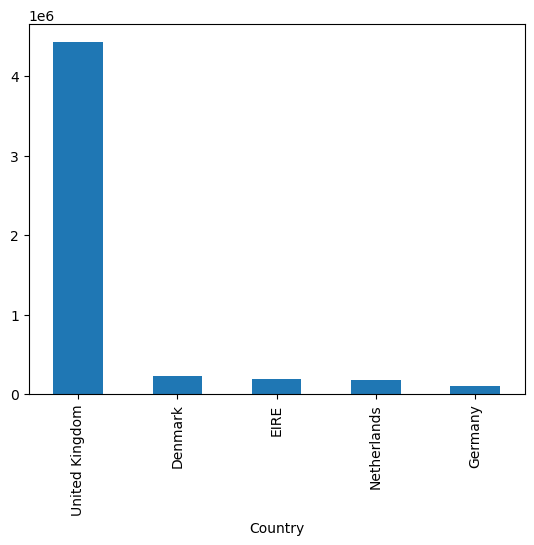

In [28]:
# Top 5 Countries with highest number of sales
sales_by_country[:5].plot(kind = 'bar')

<AxesSubplot: xlabel='Country'>

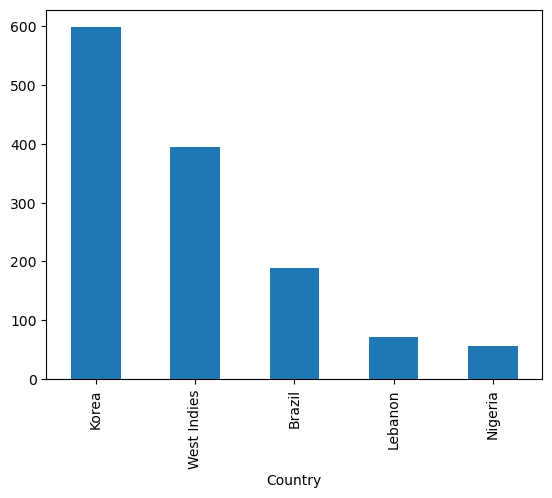

In [31]:
# 5 Countries with lowest number of sales
sales_by_country[35:].plot(kind = 'bar')

In [32]:
# Adding year feature to the dataset 

time = dataset['InvoiceDate'].dt.year

dataset['Year'] = time

dataset.head()

,Customer ID,StockCode,Invoice,Quantity,Price,InvoiceDate,Description,Country,Total_amount,Year
0,13085.0,85048,489434,12,6.95,2009-12-01 07:45:00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,83.4,2009
1,13085.0,79323P,489434,12,6.75,2009-12-01 07:45:00,PINK CHERRY LIGHTS,United Kingdom,81.0,2009
2,13085.0,79323W,489434,12,6.75,2009-12-01 07:45:00,WHITE CHERRY LIGHTS,United Kingdom,81.0,2009
3,13085.0,22041,489434,48,2.10,2009-12-01 07:45:00,"RECORD FRAME 7"" SINGLE SIZE",United Kingdom,100.8,2009
4,13085.0,21232,489434,24,1.25,2009-12-01 07:45:00,STRAWBERRY CERAMIC TRINKET BOX,United Kingdom,30.0,2009


<AxesSubplot: xlabel='Year'>

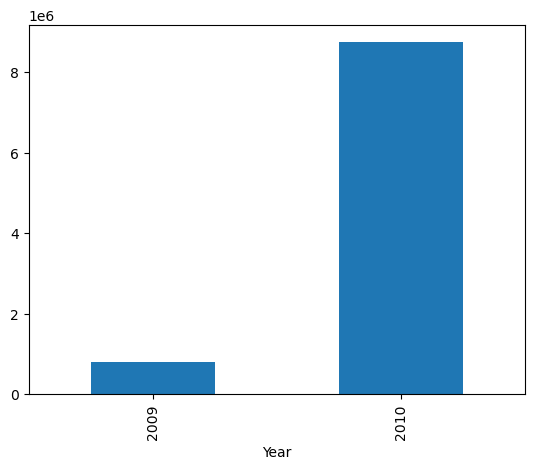

In [35]:
# Total sales for different years
dataset.groupby('Year')['Total_amount'].sum().plot(kind = 'bar')

<AxesSubplot: title={'center': 'Sales month wise'}, xlabel='Month,Year'>

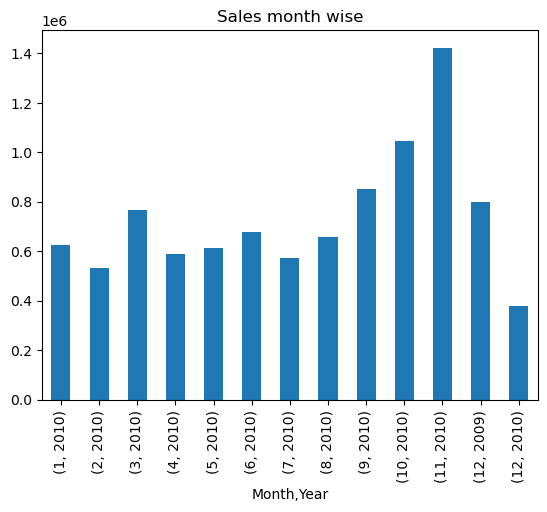

In [38]:
# Month wise sale
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset.groupby(['Month','Year'])['Total_amount'].sum().plot(kind = 'bar', title = 'Sales month wise')

<AxesSubplot: title={'center': 'Most Customers for country'}, xlabel='Country'>

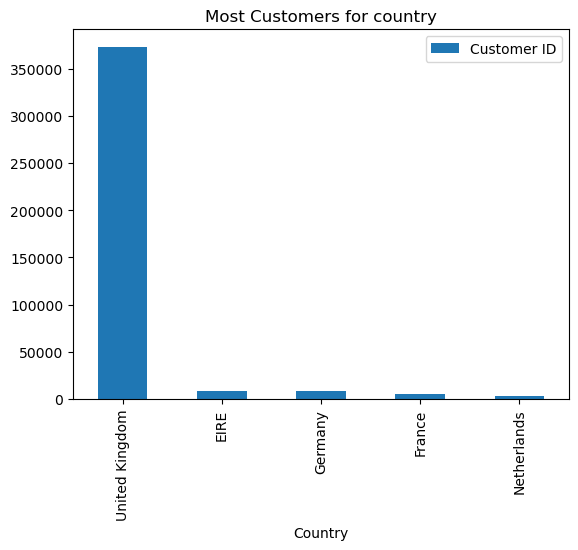

In [45]:
#Countries with most number of customers
cust_id = pd.DataFrame(clean_data.groupby('Country')['Customer ID'].count().sort_values(ascending = False))
cust_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<AxesSubplot: title={'center': 'Least customers for country'}, xlabel='Country'>

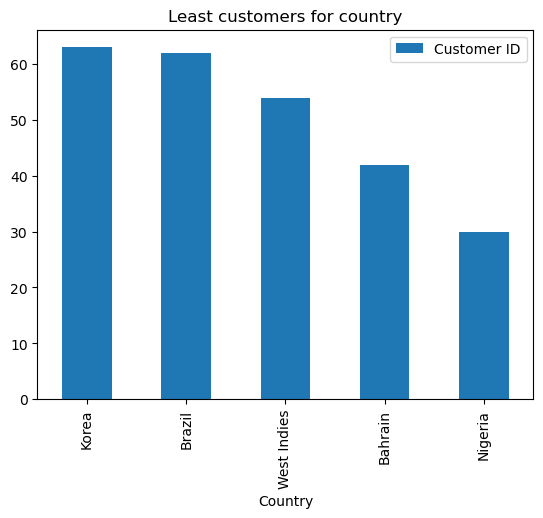

In [46]:
# Countries with least number of customers
cust_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

In [47]:
# Sales Average of each product/Popular products

avg_sales = clean_data.groupby(['StockCode','Description'])['Quantity','Total_amount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

C:\Users\Hp\AppData\Local\Temp\ipykernel_1068\2221641719.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = clean_data.groupby(['StockCode','Description'])['Quantity','Total_amount'].mean().sort_values(by = 'Quantity',ascending = False)


,,Quantity,Total_amount
StockCode,Description,,
16044,POP-ART FLUORESCENT PENS,3096.000000,194.400000
85220,SMALL FAIRY CAKE FRIDGE MAGNETS,1389.000000,461.335714
37410,BLACK AND WHITE PAISLEY FLOWER MUG,1351.526316,158.530000
37351,ORANGE FLOWER MUG,898.500000,95.025000
85218,S/5 MINI ICE CREAM FRIDGE MAGNETS,663.000000,206.950000
...,...,...,...
20879,TREE OF NOAH FESTIVE SCENTED CANDLE,-5.111111,-18.788889
35976B,WHITE SCANDINAVIAN HEART CHRISTMAS,-5.500000,-6.875000
22003,VINTAGE BLUE VACUUM FLASK 0.5L,-10.000000,-67.500000
